# I. Подготовка данных и базовые операции с NumPy

1. Загрузка и подготовка данных:

Установка необходимых библиотек, датасета

In [ ]:
pip install ucimlrepo

In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
from ucimlrepo import fetch_ucirepo

# Загрузка датасета
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# Данные (в виде pandas DataFrame)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

# Метаданные
print(seoul_bike_sharing_demand.metadata)

# Информация о переменных
print(seoul_bike_sharing_demand.variables)


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

Первичная обработка: дата преобразована в формат DataFrame из библиотеки Pandas для более удобной работы

In [ ]:
seoul_bikes = pd.concat([X, y], axis = 1)
l_seoul_bikes = len(seoul_bikes)

seoul_bikes['Date'] = pd.to_datetime(seoul_bikes['Date'], format = '%d/%m/%Y')

print(seoul_bikes)

           Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0    2017-12-01                254     0         -5.2        37         2.2   
1    2017-12-01                204     1         -5.5        38         0.8   
2    2017-12-01                173     2         -6.0        39         1.0   
3    2017-12-01                107     3         -6.2        40         0.9   
4    2017-12-01                 78     4         -6.0        36         2.3   
...         ...                ...   ...          ...       ...         ...   
8755 2018-11-30               1003    19          4.2        34         2.6   
8756 2018-11-30                764    20          3.4        37         2.3   
8757 2018-11-30                694    21          2.6        39         0.3   
8758 2018-11-30                712    22          2.1        41         1.0   
8759 2018-11-30                584    23          1.9        43         1.3   

      Visibility  Dew point temperature  Solar Radi

2. Основные операции с NumPy:

Созданы матрицы и векторы на основе датасета

In [ ]:
seoul_bikes_np = seoul_bikes.to_numpy()
temperature = seoul_bikes['Temperature'].to_numpy()
rb_count = seoul_bikes['Rented Bike Count'].to_numpy()

print('Матрица:', seoul_bikes_np)
print('Вектор 1:', temperature)
print('Вектор 2:',rb_count)

Матрица: [[Timestamp('2017-12-01 00:00:00') 254 0 ... 'Winter' 'No Holiday' 'Yes']
 [Timestamp('2017-12-01 00:00:00') 204 1 ... 'Winter' 'No Holiday' 'Yes']
 [Timestamp('2017-12-01 00:00:00') 173 2 ... 'Winter' 'No Holiday' 'Yes']
 ...
 [Timestamp('2018-11-30 00:00:00') 694 21 ... 'Autumn' 'No Holiday' 'Yes']
 [Timestamp('2018-11-30 00:00:00') 712 22 ... 'Autumn' 'No Holiday' 'Yes']
 [Timestamp('2018-11-30 00:00:00') 584 23 ... 'Autumn' 'No Holiday' 'Yes']]
Вектор 1: [-5.2 -5.5 -6.  ...  2.6  2.1  1.9]
Вектор 2: [254 204 173 ... 694 712 584]


3. Индексация и срезы:

Выялена тенденций взятия велосипедов в прокат по месяцам

In [ ]:
mounths = np.zeros(12)
for i in range(1, 13):
  mounth = seoul_bikes[seoul_bikes['Date'].dt.month == i]
  mounths[i - 1] = mounth['Rented Bike Count'].mean()

print('Тенденция по месяцам:', mounths)

Тенденция по месяцам: [ 201.62096774  225.94196429  511.55107527  728.09305556  950.38709677
 1245.67638889  987.17741935  876.1922043   935.57222222  874.56317204
  646.82638889  249.09946237]


# II. Операции с векторами и матрицами

1. Операции над векторами:

In [ ]:
print('Сумма', temperature + rb_count)
print('Произведение', temperature * rb_count)
print('Скалярное произведение', temperature @ rb_count)
print('Применение broadcasting', rb_count * max(mounths))

Сумма [248.8 198.5 167.  ... 696.6 714.1 585.9]
Произведение [-1320.8 -1122.  -1038.  ...  1804.4  1495.2  1109.6]
Скалярное произведение 115860790.8
Применение broadcasting [316401.80277778 254117.98333333 215502.01527778 ... 864499.41388889
 886921.58888889 727475.01111111]


2. Скалярное произведение:

Анализ сходства между средним взятием в прокат велосипедов зимой и летом


In [ ]:
spring = mounths[2:5]
autmn = mounths[9:12]
cos_similarity_ws = (spring @ autmn) / (np.linalg.norm(spring) * np.linalg.norm(autmn))

print(cos_similarity_ws)


0.7950305374266461


# III. Анализ сходства между векторами

1. Корреляция и косинусное сходство:

In [ ]:
import math

def corr_pirson(a, b):
  if len(a) != len(b):
    return('Error: length of vector don`t coincide')

  mean_a = np.mean(a)
  mean_b = np.mean(b)
  numerator = denominator_1 = denominator_2 = 0
  for i in range(len(a)):
    numerator += (a[i] - mean_a) * (b[i] - mean_b)
    denominator_1 += (a[i] - mean_a)**2
    denominator_2 += (b[i] - mean_b)**2

  ans = numerator / (math.sqrt(denominator_1 * denominator_2))
  return(ans)

def cos_similarity(a, b):
  return((a @ b) / (np.linalg.norm(a) * np.linalg.norm(b)))

print('Корреляция между температурой и арендой:', corr_pirson(temperature, rb_count))
print('функция numpy:', np.corrcoef(temperature, rb_count)[0, 1])
print('Ксоинусное сходство между температурой и арендой:', cos_similarity(temperature, rb_count))
print('функция numpy:', 1 - scipy.spatial.distance.cosine(temperature, rb_count))

Корреляция между температурой и арендой: 0.5385581530139743
функция numpy: 0.5385581530139789
Ксоинусное сходство между температурой и арендой: 0.7881519894084646
функция numpy: 0.7881519894084646


2. Нормализация векторов

In [ ]:
def norm_unit_l(a):
  return (a / np.linalg.norm(a))

unit_l_temperature = norm_unit_l(temperature)
print("Lenght:", np.linalg.norm(unit_l_temperature))
print("Cosine similarity:", 1 - scipy.spatial.distance.cosine(temperature, unit_l_temperature))

Lenght: 0.9999999999999998
Cosine similarity: 1.0


3. Поиск сходства:

Для поиска похожий дней была использована эвклидова метрика

In [ ]:
def get_similar_day(hour, dataset):
  hour = hour.loc[['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',  'Dew point temperature', 'Solar Radiation',  'Rainfall', 'Snowfall']]
  dataset = dataset[['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',  'Dew point temperature', 'Solar Radiation',  'Rainfall', 'Snowfall']]

  similar_hour = []
  for i in range(len(dataset)):
    if scipy.spatial.distance.euclidean(hour, dataset.iloc[i]) <= 50:
      similar_hour.append(i)

  return similar_hour

random_hour = seoul_bikes[seoul_bikes['Date'].dt.date == pd.to_datetime('2018-08-08').date()].iloc[0]
similar_hour = get_similar_day(random_hour, seoul_bikes)
for i in similar_hour:
  print(seoul_bikes.iloc[i])
  print('')

Date                     2018-07-17 00:00:00
Rented Bike Count                        878
Hour                                      15
Temperature                             31.9
Humidity                                  51
Wind speed                               3.3
Visibility                              1465
Dew point temperature                   20.4
Solar Radiation                         3.01
Rainfall                                 0.0
Snowfall                                 0.0
Seasons                               Summer
Holiday                           No Holiday
Functioning Day                          Yes
Name: 5487, dtype: object

Date                     2018-08-08 00:00:00
Rented Bike Count                        853
Hour                                       0
Temperature                             29.1
Humidity                                  77
Wind speed                               2.1
Visibility                              1465
Dew point temperature       

# IV. Прогнозирование и кластеризация

1. Фильтрация временных рядов:

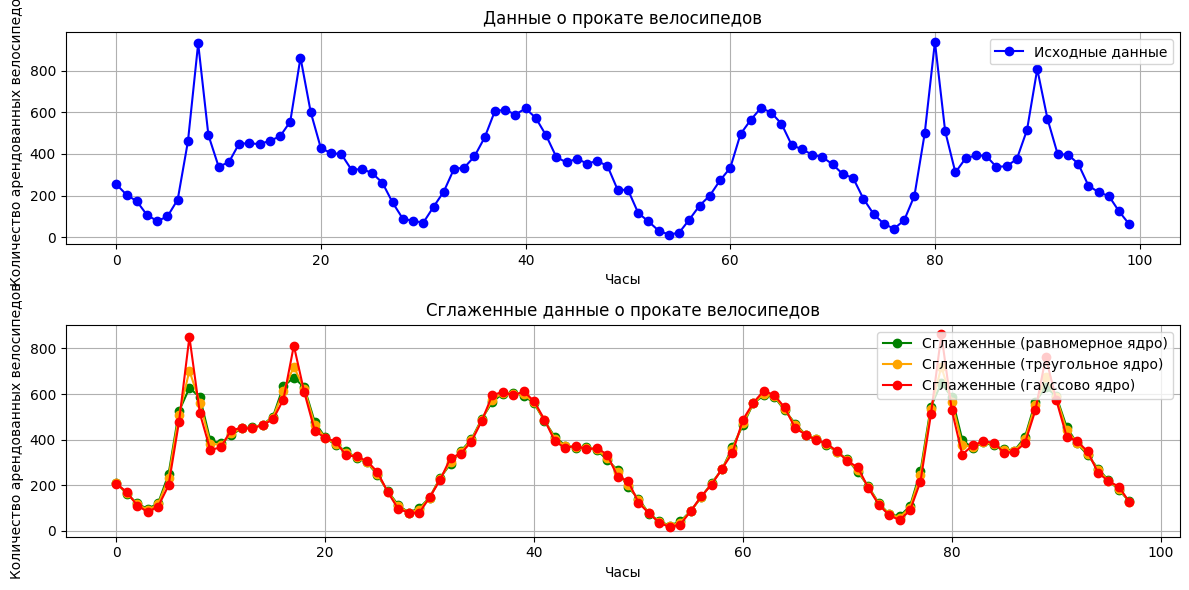

In [ ]:
def time_series_filter(data, kernel):
    kernel = kernel / np.sum(kernel)
    smoothed_data = np.convolve(data, kernel, mode='valid')

    return smoothed_data

#Ядра для коллеряции
uniform_kernel = np.ones(3) / 3
triangular_kernel = np.array([1, 2, 1]) / 4
gaussian_kernel = np.exp(-np.linspace(-1.5, 1.5, 3)**2)
gaussian_kernel /= np.sum(gaussian_kernel)

#Свёртки по разным ядрам
smoothed_uniform = time_series_filter(rb_count[:100], uniform_kernel)
smoothed_triangular = time_series_filter(rb_count[:100], triangular_kernel)
smoothed_gaussian = time_series_filter(rb_count[:100], gaussian_kernel)

#Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(rb_count[:100], marker = 'o', label = 'Исходные данные', color = 'blue')
plt.title('Данные о прокате велосипедов')
plt.xlabel('Часы')
plt.ylabel('Количество арендованных велосипедов')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(smoothed_uniform, marker = 'o', label = 'Сглаженные (равномерное ядро)', color ='green')
plt.plot(smoothed_triangular, marker = 'o', label = 'Сглаженные (треугольное ядро)', color ='orange')
plt.plot(smoothed_gaussian, marker='o', label = 'Сглаженные (гауссово ядро)', color ='red')
plt.title('Сглаженные данные о прокате велосипедов')
plt.xlabel('Часы')
plt.ylabel('Количество арендованных велосипедов')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()

2. Кластеризация методом k-средних:

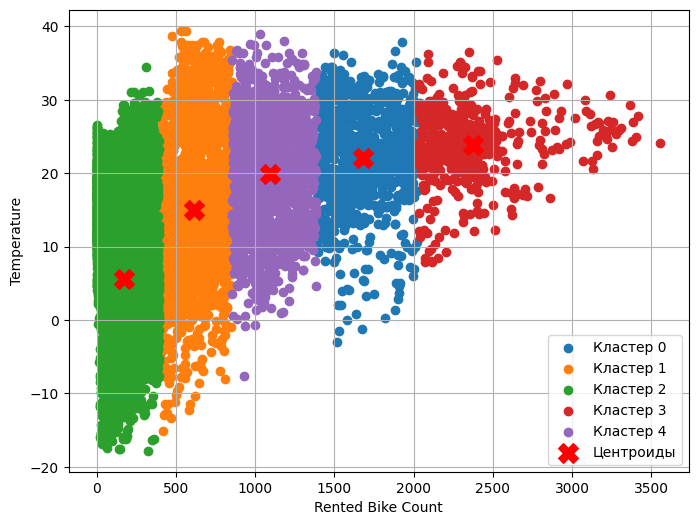

In [ ]:
def k_means(data, k, max_iters = 100, tol = 1e-4):
    data_np = data.to_numpy()

    #Случайное распределение центроид
    np.random.seed(42)
    indices = np.random.choice(data_np.shape[0], k, replace = False)
    centroids = data_np[indices]

    for _ in range(max_iters):
        #Определение расстояний от точек до центроид
        distances = np.linalg.norm(data_np[:, np.newaxis] - centroids, axis=2)

        #Определение принадлежности точки у центроиду
        labels = np.argmin(distances, axis=1)

        #Вычесление новых координат центроид
        new_centroids = np.array([data_np[labels == i].mean(axis = 0) for i in range(k)])

        #Проверка сходимости
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return pd.Series(labels, index=data.index), centroids

#Фунция визуализации
def print_klasters(data, k):
  labels, centroids = k_means(data, k)
  plt.figure(figsize=(8, 6))

  for i in range(k):
      cluster_points = data[labels == i]
      plt.scatter(cluster_points["Rented Bike Count"], cluster_points["Temperature"], label=f"Кластер {i}")

  plt.scatter(centroids[:, 0], centroids[:, 1], c = "red", marker = "X", s=200, label = "Центроиды")

  plt.ylabel("Temperature")
  plt.xlabel("Rented Bike Count")
  plt.legend()
  plt.grid()
  plt.show()

data = seoul_bikes[['Rented Bike Count', 'Temperature']]
k = 5

print_klasters(data, k)

# V. Генерация случайных данных и анализ

1-2. Генерация случайных данных. Анализ случайных данных:

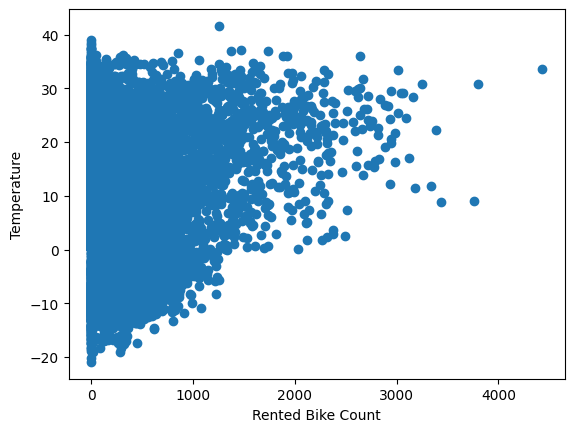

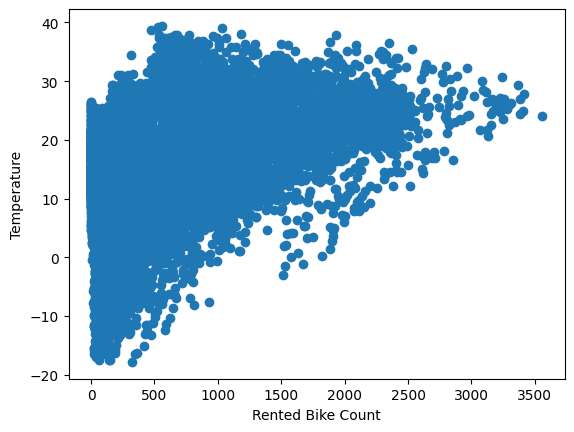

Корреляция по температуре 0.5501062484565424
Корреляция по количеству велосипедов 0.009799823182682436


In [ ]:
def print_data(data):
    plt.scatter(data["Rented Bike Count"], data["Temperature"])
    plt.xlabel("Rented Bike Count")
    plt.ylabel("Temperature")
    plt.show()

data_rd = pd.DataFrame({'Rented Bike Count': [], 'Temperature': []})

step = 40 / 8760
k = -10
for i in range(8760):
  k += step
  temp = np.random.normal(loc = k , scale = 4)

  if temp > 0:
    rb_count_rd = np.random.normal(loc = k , scale = 20 * temp + abs(np.random.normal(loc = 500 , scale = 300)))
  else:
    rb_count_rd = abs(np.random.normal(loc = 500 , scale = 300)) + temp * 30

  if rb_count_rd < 0:
    rb_count_rd = 0

  data_rd.loc[i] = [rb_count_rd, temp]

k = 5
print_data(data_rd)
print_data(data)
print('Корреляция по температуре', np.corrcoef(data['Temperature'].to_numpy(), data_rd['Temperature'].to_numpy())[1, 0])
print('Корреляция по количеству велосипедов', np.corrcoef(data['Rented Bike Count'].to_numpy(), data_rd['Rented Bike Count'].to_numpy())[1, 0])
